In [46]:
import pickle

AA_seqs, thermo_data = pickle.load( open( "save.p", "rb" ) )

y_data = []
for i in thermo_data:
    y_data.append(float(i[1]))


In [47]:
parents = AA_seqs[0:3]

anything = AA_seqs


In [48]:
print (y_data)

[55.0, 43.0, 49.0, 39.8, 52.9, 48.8, 45.0, 48.3, 61.5, 54.6, 51.2, 47.3, 51.6, 45.4, 50.8, 43.3, 53.4, 49.1, 52.6, 39.2, 47.9, 46.8, 51.0, 47.8, 49.4, 53.3, 56.9, 46.0, 51.2, 50.6, 47.1, 45.7, 42.9, 47.9, 48.4, 48.7, 49.1, 52.6, 49.3, 47.3, 45.6, 63.2, 50.6, 50.7, 50.3, 51.3, 39.5, 48.9, 46.6, 54.9, 52.9, 53.0, 53.8, 48.7, 52.0, 50.8, 51.1, 60.0, 47.2, 51.7, 51.0, 49.0, 48.0, 42.4, 45.7, 50.5, 58.5, 56.9, 49.3, 47.4, 48.0, 49.9, 46.3, 49.5, 44.9, 51.0, 48.5, 52.8, 52.5, 42.5, 49.6, 45.4, 50.7, 52.4, 49.0, 50.1, 57.9, 53.7, 46.5, 50.5, 46.6, 58.9, 50.5, 54.9, 51.3, 49.9, 62.4, 44.8, 48.3, 47.9, 50.4, 51.9, 56.1, 54.2, 44.0, 54.8, 50.6, 40.6, 55.7, 51.8, 47.5, 46.4, 58.5, 45.5, 50.9, 49.3, 50.3, 53.8, 53.0, 48.8, 55.3, 49.5, 50.4, 51.0, 47.4, 43.5, 50.9, 49.4, 46.3, 48.4, 43.9, 52.3, 64.4, 53.1, 43.1, 50.1, 51.4, 50.9, 47.2, 54.9, 61.2, 51.9, 54.4, 47.7, 50.6, 46.3, 50.5, 54.3, 44.0, 43.6, 56.9, 60.0, 43.1, 48.8, 56.3, 48.8, 53.0, 53.0, 56.2, 46.7, 48.4, 57.2, 47.1, 49.7, 47.8, 49.1, 48.

In [49]:
# This function one-hot encodes a list of sequences based on the parents
# anything - a list variable containing strings that represent each of the sequences to be encoded
# parents - a list variable containting strings of the sequences that all of the sequences are based on
# interval - the number of characters that separate each individual position. Ex: For DNA codons interval = 3
# return anything_encoded - a list containing a list for each one-hot encoded sequence
# return pos_coding - a list variable used for decoding sequences
def oneHotEncodeOptimizedv2 (anything, parents, interval=1):
    #    First creates a matrix called pos_coding of all the possible positions
    #    Ex: If parents are ['ATR', 'AYR', 'RQR'] with interval=1, then pos_coding =
    #    |[A, R]   |
    #    |[T, Y, Q]|
    #    |[R]      |
    #    pos_coding is also used in the decoding algorithm
    pos_coding = []
    # At each position in the sequences:
    for i in range(int(len(parents[0])/interval)):
        pos_coding.append([])
        # Each new code will be appended to the list of codes for that position
        for j in range(len(parents)):
            if (pos_coding[i].count(parents[j][i*interval:(i+1)*interval])==0):
                pos_coding[i].append(parents[j][i*interval:(i+1)*interval])
    # Encoding algorithm
    anything_encoded = []
    for i in range(len(anything)):
        # Appends a 1 to the first position of each encoded sequence for normalization
        individual_encoded = [1]
        for j in range(len(pos_coding)):
            pos = anything[i][j*interval:(j+1)*interval]
            num = pos_coding[j].index(pos)
            # Appends a 0 for when the code equals one of the codes in pos_coding for that position
            for k in range(len(pos_coding[j])-1):
                if ((k+1)==num):
                    individual_encoded.append(1)
                else:
                    individual_encoded.append(0)
        # Appends the individual sequence to the list of encoded sequences
        anything_encoded.append(individual_encoded)
    
    return anything_encoded, pos_coding

# This function decodes a list of sequences that have been one-hot encoded by the oneHotEncodeOptimizedv2 function
# anything - a list/matrix of one hot-encoded sequences
# pos_coding - a list variable obtained when one-hot encoding the original sequences
# interval - the number of characters that separate each individual position. Ex: For DNA codons interval = 3
# returns anything_decoded - a list variable containting strings of the decoded sequences
def decodeOneHotEncodeOptimizedv2 (anything, pos_coding, interval=1):
    
    anything_decoded = []
    for i in range(len(anything)):
        # decodes each individual and appends it to a list of all decoded sequences
        individual_encoded = anything[i].copy()
        # removes the first normalizing 1 before decoding
        individual_encoded.remove(1)
        individual_decoded = ''
        curr_pos = 0                                    
        for j in range(len(pos_coding)):
            # grabs the code for a single position and then decodes it
            pos = individual_encoded[curr_pos:curr_pos+interval*(len(pos_coding[j])-1)]
            try:
                #searches for a 1
                ind = pos.index(1)
                # appends the matching parent's original code
                individual_decoded = individual_decoded + pos_coding[j][ind+1]
            except ValueError:
                # this is reached if the current position is the same as in parent 1 -> appends parent 1 for this pos
                individual_decoded = individual_decoded + pos_coding[j][0]
            curr_pos += len(pos_coding[j])-1
        anything_decoded.append(individual_decoded)
    return anything_decoded


In [50]:
AA_seqs_encoded, pos_coding = oneHotEncodeOptimizedv2(anything, parents)

AA_seqs_decoded = decodeOneHotEncodeOptimizedv2(AA_seqs_encoded, pos_coding)


Code to test oneHotEncode and decodeOneHotEncode methods

#parents = ['AAACCCTTT','AAACCGTTT','ACACCATTT']
#anything = ['AAACCCTTT','AAACCGTTT','ACACCATTT','ACACCCTTT','AAACCATTT','ACACCGTTT']
parents = ['AAAAAA','CCCCCC','GGGGGG','ACTACT']
anything = ['AAAAAA','CCCCCC','GGGGGG','ACTACT','AAACCC','GGGACT']

print (anything)

code, pos_coding = oneHotEncodeOptimizedv2(anything, parents, 1)
decode = decodeOneHotEncodeOptimizedv2(code,pos_coding)


print(decode)


#Ensures that sequences are being encoded and decoded properly such that no data is lost <br />
print (AA_seqs == AA_seqs_decoded)

In [51]:
# Least squares linear regression function

import numpy as np

# X - a numpy array representing the independent variable/sequence
# y - a numpy array representing the dependent variable
# Returns a beta_hat such that y=BX where beta_hat reduces the least square error
def LinearRegressionV1(X, y):
    beta_hat = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    return beta_hat
    

In [52]:
# Ridge regression function

# X - a numpy array representing the independent variable/sequence
# y - a numpy array representing the dependent variable
# Returns beta_hat_R such that y=BX where beta_hat reduces the least squares error and the coefficients of beta_hat_R
def RidgeRegressionV1(X, y, l=0):
    beta_hat_R = np.linalg.pinv(X.transpose().dot(X)+l*np.identity(len(X[0]))).dot(X.transpose()).dot(y)
    return beta_hat_R

In [53]:
# Leave-One-Out Cross Validation Function

# X - a list representing the independent variable/sequence
# y - a list representing the dependent variable
# model - a function that runs some form of regression
# Returns y_hats - the predicted value of X[i] is represented as y_hats[i]
# Returns r - the correlation coefficient for this model
# Returns mserr - the mean square error for this model
def leaveOneOutCV(X, y, model, l=0):
    y_hats = []
    mserr = 0
    for i in range(len(X)):
        #Create train set
        train_X = X.copy()
        train_y = y.copy()
        train_X.pop(i)
        train_y.pop(i)
        train_X = np.array(train_X)
        train_y = np.array(train_y)
        beta = 0
        if (model == LinearRegressionV1):
            beta = model(train_X, train_y)
        elif (model == RidgeRegressionV1):
            beta = model(train_X, train_y, l) #Could condense these if statements into 2 lines with ridge reg
        y_hats.append(beta.dot(X[i]))
        mserr += (y[i]-beta.dot(X[i]))**2
    mserr = mserr/len(X)
    r = np.corrcoef(np.array(y),np.array(y_hats))[0][1]
    return y_hats, r, mserr
    

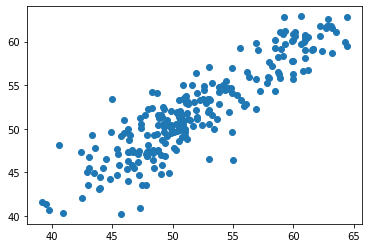

0.9001551492371886
6.298191502700996


In [54]:
# Leave-One-Out CV function check 
y_hats, r, mserr = leaveOneOutCV(AA_seqs_encoded, y_data, RidgeRegressionV1)

import matplotlib.pyplot as plt
plt.plot(y_data,y_hats,'o')
plt.show()
print (r)
print (mserr)

In [56]:
# 10% Cross Validation Function

# X - a list representing the independent variable/sequence
# y - a list representing the dependent variable
# model - a function that runs some form of regression
# seed - sets a seed for randomly selecting the 10 lists
# Returns y_actual - values of y, in different order
# Returns y_hats - the predicted value of X[i] is represented as y_hats[i]
# Returns r - the correlation coefficient for this model
# Returns mserr - the mean square error for this model


def tenPercentCV(X, y, model, seed = 10, l=0):
    # Sets a seed 
    import random
    random.seed(seed)
    
    # First divide up the indexes into 10 different random test sets
    test_sets = [[] for i in range(10)] # Ten empty lists
    total = [i for i in range (len(X))] # List of all possible indexes of data
    for i in range (len(X)):
        rand_ind = random.randint(0,len(total)-1)
        test_sets[i%10].append(total.pop(rand_ind))

    # Now create 10 regression models based on each train set and predict y values from the test set for each one
    y_hats = []
    y_actual = []
    mse = 0
    for i in range(10):
        # Initialize train and test set
        copy_train_X, copy_train_y, copy_test_X, copy_test_y = ([] for j in range(4))
        for j in range(len(X)):
            if j in test_sets[i]:
                copy_test_X.append(X[j])
                copy_test_y.append(y[j])
            else:
                copy_train_X.append(X[j])
                copy_train_y.append(y[j])
        train_X = np.array(copy_train_X)
        train_y = np.array(copy_train_y)
        test_X = np.array(copy_test_X)
        test_y = np.array(copy_test_y)
        beta = 0
        if (model == LinearRegressionV1):
            beta = model(train_X, train_y)
        elif (model == RidgeRegressionV1):
            beta = model(train_X, train_y, l) #Could condense these if statements into 2 lines with ridge reg
        # Predicts y values and appends them to their respective lists
        for i in range(len(test_y)):
            y_hats.append(beta.dot(test_X[i]))
            y_actual.append(test_y[i])
            mse += (test_y[i]-beta.dot(test_X[i]))**2
            
    r = np.corrcoef(np.array(y_actual), np.array(y_hats))[0][1]
    mse = mse/len(y_actual)
    return y_hats, y_actual, r, mserr

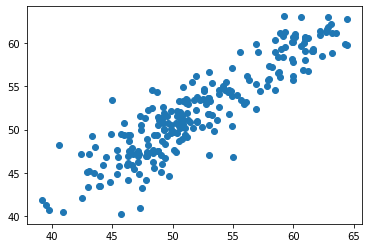

0.9023017842213583
6.298191502700996


In [58]:
# 10% CV function check
y_hats, y_actual, r, mserr = tenPercentCV(AA_seqs_encoded, y_data, RidgeRegressionV1)

import matplotlib.pyplot as plt
plt.plot(y_actual,y_hats,'o')
plt.show()
print (r)
print (mserr)

In [17]:
#Tests many lambdas over logspace

lambdas = np.logspace(-10, 1.5)

mserrs = []

for i in lambdas:
    Y_hats, r, mserr = leaveOneOutCV(AA_seqs_encoded, y_data, RidgeRegressionV1, i)
    mserrs.append(mserr)


[-10.0, -9.76530612244898, -9.53061224489796, -9.295918367346939, -9.061224489795919, -8.826530612244898, -8.591836734693878, -8.357142857142858, -8.122448979591837, -7.887755102040816, -7.653061224489796, -7.418367346938775, -7.183673469387755, -6.948979591836735, -6.7142857142857135, -6.479591836734693, -6.244897959183673, -6.0102040816326525, -5.775510204081632, -5.540816326530612, -5.3061224489795915, -5.071428571428571, -4.836734693877551, -4.6020408163265305, -4.36734693877551, -4.13265306122449, -3.8979591836734695, -3.6632653061224483, -3.428571428571428, -3.1938775510204076, -2.9591836734693873, -2.724489795918367, -2.4897959183673466, -2.2551020408163263, -2.020408163265306, -1.7857142857142847, -1.5510204081632644, -1.316326530612244, -1.0816326530612237, -0.8469387755102034, -0.612244897959183, -0.3775510204081627, -0.14285714285714238, 0.09183673469387797, 0.3265306122448983, 0.5612244897959187, 0.795918367346939, 1.0306122448979593, 1.2653061224489797, 1.5]
[6.43931166363

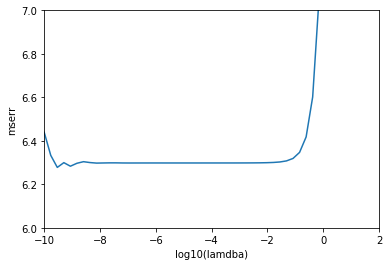

In [61]:
import matplotlib.pyplot as plt

ls = []
for i in range(len(lambdas)):
    ls.append(np.log10(lambdas[i]))
print (ls)

plt.plot(ls,mserrs)
plt.xlabel('log10(lamdba)')
plt.ylabel('mserr')
plt.axis([-10,2,6,7])
print (mserrs)
plt.show()

In [19]:
# Selects a standard lambda and prints the lambda
print(lambdas[mserrs.index(min(mserrs))])
std_l = lambdas[mserrs.index(min(mserrs))]

2.94705170255181e-10


In [62]:
#Generate Machine Learning Curve

#This function, assess how well a model works for a certain train and test set
#train_X, train_y - lists containing the encoded data and the function data
#model - LinearRegressionV1 or RidgeRegressionV1
#test_X, test_y - lists containing the test set
def predictTestSet(train_X, train_y, model, test_X, test_y, l=0):
    #Convert train and test sets to numpy arrays
    train_X = np.array(train_X)
    train_y = np.array(train_y)
    test_X = np.array(test_X)
    test_y = np.array(test_y)
    
    #Generate model with train set
    beta = 0
    if (model == LinearRegressionV1):
        beta = model(train_X, train_y)
    elif (model == RidgeRegressionV1):
        beta = model(train_X, train_y, l) #Could condense these if statements into 2 lines with ridge reg
    
    #Use the model to predict y_hat for each test sequence in test X and evaluate the mean-squared error 
    #and correlation coeefficent
    y_hats = []
    mserr = 0
    for i in range(len(test_X)):
        y_hat = beta.dot(test_X[i])
        y_hats.append(y_hat)
        mserr += (y_hat-test_y[i])**2
    r = np.corrcoef(test_y, np.array(y_hats))[0][1]

    return y_hats, r, mserr

#Set X, y
X = AA_seqs_encoded
y = y_data

#Set seed to ensure reproducibility
seed = 10
import random
random.seed(seed)

#Parameters for running ML curve generation:
#train_sizes - a list of the sizes of the training set that will be evaluated, ind. var. ML curve
#num_sims - increase num_sims for law of large numbers to apply
train_sizes = [i for i in range(1,100)]
num_sims = 100

#Initialize variables used to evaluate ML curve
r_values = [[] for i in train_sizes]
mserr_values = [[] for i in train_sizes]


#Each k represents a simulation
for k in range(num_sims):
    #Set aside 10% of the data, this will be used to assess the error of the model created for each training size
    test_set_X = []
    test_set_y = []
    total_train_set_X = []
    total_train_set_y = []
    total = [i for i in range (len(X))] # List of all possible indexes of data

    for i in range (len(X)):
        rand_ind = random.randint(0,len(total)-1)
        ind = total.pop(rand_ind)
        if (i%10 == 0):
            test_set_X.append(X[ind])
            test_set_y.append(y[ind])
        else:
            total_train_set_X.append(X[ind])
            total_train_set_y.append(y[ind])

    #Creates a model for each training size and evaluates the model
    for i in range (len(train_sizes)):
        #creates train set containg the current train_size number of sequences
        total_train_set_X_c = total_train_set_X.copy()
        total_train_set_y_c = total_train_set_y.copy()
        train_X = []
        train_y = []
        for j in range(train_sizes[i]):
            rand_ind = random.randint(0,len(total_train_set_X_c)-1)
            train_X.append(total_train_set_X_c.pop(rand_ind))
            train_y.append(total_train_set_y_c.pop(rand_ind))
        #creates model and predicts y_hats for each sequence in the original test set
        y_hats, r, mserr = predictTestSet(train_X, train_y, RidgeRegressionV1, test_set_X, test_set_y, std_l)
        mserr_values[i].append(mserr)
        r_values[i].append(r)
    
        


In [63]:
r_ML_curve = []
mserr_ML_curve = []
for i in range(len(r_values)):
    r_ML_curve.append(np.average(np.array(r_values[i])))
    mserr_ML_curve.append(np.average(np.array(mserr_values[i])))
print (mserr_values)



[[19779.266571661214, 19686.818038029323, 19128.198131939447, 17314.624175298813, 26549.162687487777, 14962.90518356972, 7066.579534914643, 18474.839067723402, 24027.066744767493, 17346.167372351687, 17968.522660737533, 8321.036080150201, 20489.05549878241, 14685.932550786369, 17770.789573256912, 14928.024933013437, 21193.825221478408, 28771.735590954915, 10357.738136836853, 8681.454225249492, 6088.302698060326, 7612.226937675522, 6423.831459106646, 22687.348586378776, 20874.390786073112, 10822.195225478272, 21114.09333638704, 20529.08092097582, 17520.27035955621, 18573.82896594047, 4487.731300965872, 3919.587757186927, 15092.809716761678, 6247.234830403568, 13077.890776701526, 12435.055311660404, 25404.63756996228, 19074.249578182942, 5409.531033080269, 22066.683351126052, 9376.745734523063, 13947.713018507535, 32670.63508639703, 6451.254358467912, 22922.40270775838, 17773.871090562392, 12589.085987515002, 11538.677324181219, 27855.000117158856, 20139.255832231218, 20494.218648371963,

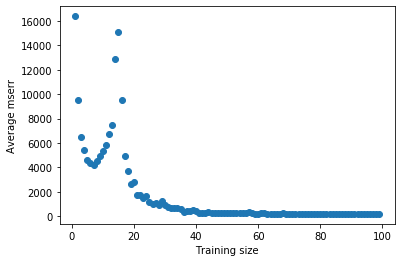

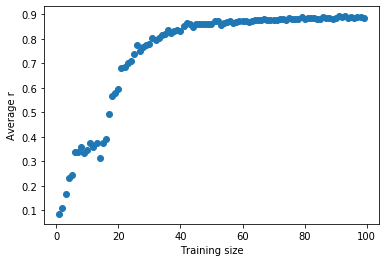

In [64]:
plt.plot(train_sizes,mserr_ML_curve,'o')
plt.xlabel('Training size')
plt.ylabel('Average mserr')
plt.show()
plt.plot(train_sizes,r_ML_curve,'o')
plt.xlabel('Training size')
plt.ylabel('Average r')
plt.show()